In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


No categorical variables here which need encoding

Chest Pain is given in ordinal scale

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No null values

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [9]:
df['target'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

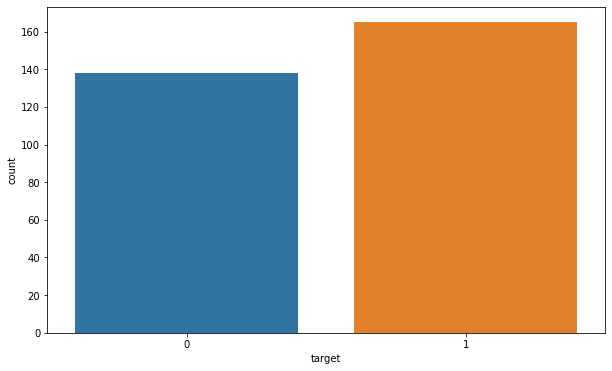

In [11]:
plt.figure(figsize=(10,6))

sns.countplot(data = df, x = 'target')

target is not unbalanced

<Figure size 1200x800 with 0 Axes>

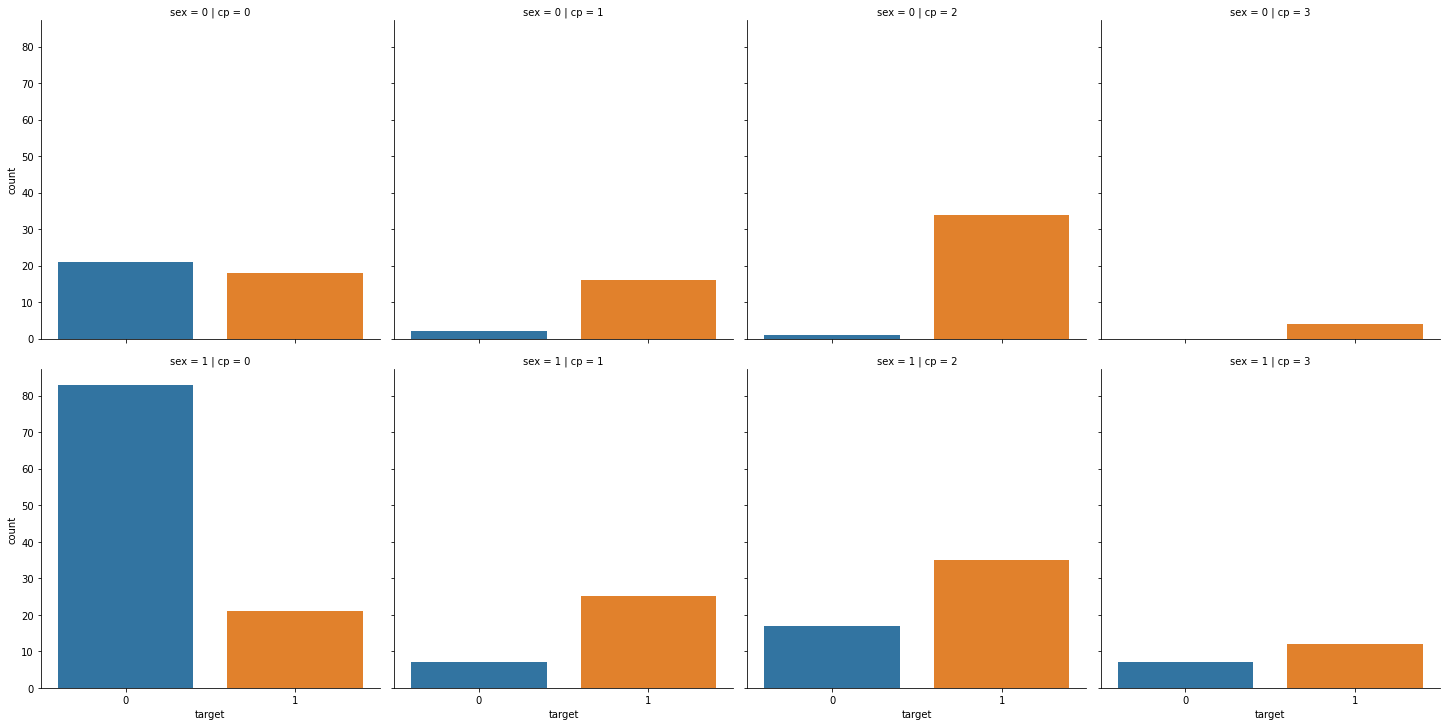

In [29]:
plt.figure(dpi=200)
sns.catplot(data = df, row='sex', col = 'cp' ,x = 'target', kind = 'count')


In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

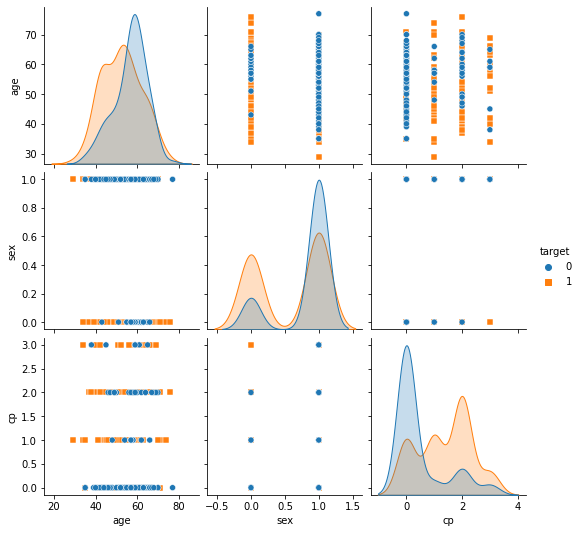

In [43]:
sns.pairplot(df[['age', 'sex', 'cp', 'target']], hue = 'target', markers=['o', 's'])

<AxesSubplot:xlabel='age', ylabel='thalach'>

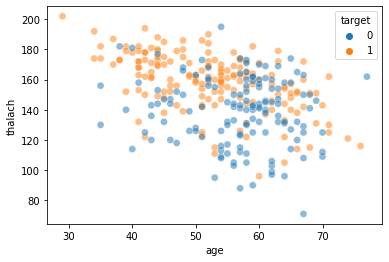

In [66]:
sns.scatterplot(data = df, x = 'age', y = 'thalach', hue = 'target',alpha = 0.5, s =50)

In [61]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, classification_report

In [69]:
X = df.drop('target', axis = 1)

In [70]:
y = df['target']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 99)

In [201]:
scaler = StandardScaler()

In [202]:
X_train = scaler.fit_transform(X_train)

In [203]:
X_test = scaler.transform(X_test)

In [204]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=10000)

In [205]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,10,20)
C = np.logspace(0,10,20)

In [206]:
param_grid = {
    'penalty':penalty,
    'l1_ratio': l1_ratio,
    'C': C
}

In [207]:
grid_model = GridSearchCV(log_model, param_grid=param_grid,cv=5 )

In [208]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [209]:
grid_model.best_estimator_

LogisticRegression(l1_ratio=0.0, max_iter=10000, multi_class='ovr',
                   penalty='l1', solver='saga')

In [210]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [211]:
y_pred = grid_model.predict(X_test)

In [212]:
accuracy_score(y_test, y_pred)

0.9354838709677419

In [213]:
precision_score(y_test, y_pred)

0.95

In [214]:
recall_score(y_test, y_pred)

0.95

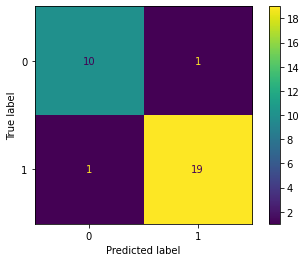

In [215]:
plot_confusion_matrix(grid_model, X_test,y_test)

In [216]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.95      0.95      0.95        20

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

